In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # Pixel 28 x 28 photo tulisan 0-9

In [2]:
# Memisahkan Dataset menjadi bagian validation dan Training
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

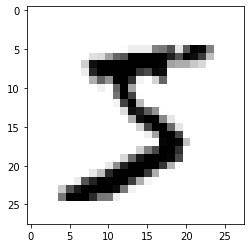

In [3]:
# Library Matplotlib untuk visualisasi 
import matplotlib.pyplot as plt

# Menampilkan Photo Mnist
# Cmap = Color Map membuat gambar menjadi gaada warnanya 
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

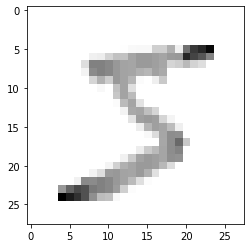

In [4]:
# Mengnormalisasi menggunakan fungsi tf keras
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# Gambar menjadi sedikit burem
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [5]:
from tensorflow.keras.layers import Flatten,Conv2D,Dense
# Membuat model dari Deep Learning
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # Membuat gambar menjadi 1 Dimensi
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1087 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 2s 888us/step - loss: 0.0733 - accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.0535 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.0411 - accuracy: 0.9865


In [6]:
# Mengecek validation lose
val_loss, val_acc = model.evaluate(x_test,y_test) 
print(val_loss,val_acc)

313/313 [==============================] - 0s 654us/step - loss: 0.0920 - accuracy: 0.9748
0.09202993661165237 0.9747999906539917


In [7]:
# Mengsave model untuk bisa digunakan nanti
# model.save('epic_num_reader.model')  

In [8]:
# meng-load kembali model yang sudah kita save
# new_model = tf.keras.models.load_model('epic_num_reader.model')

In [9]:
# Mengprediksi x_test untuk di cek apakah benar atau tidak
predictions = model.predict([x_test])
print(predictions)

Consider rewriting this model with the Functional API.
[[3.3298889e-10 2.4740172e-09 4.2912691e-09 ... 9.9999833e-01
  5.9288560e-11 3.1754002e-08]
 [1.7542394e-12 1.4034917e-05 9.9998593e-01 ... 4.4002138e-10
  1.0318811e-10 5.7170543e-18]
 [1.2108371e-09 9.9999416e-01 1.0888823e-07 ... 3.8666853e-06
  7.0074310e-07 8.7902254e-09]
 ...
 [8.7817519e-13 2.3227471e-09 1.6623652e-13 ... 1.1204742e-06
  2.0027352e-08 1.2148170e-07]
 [1.4519026e-09 7.0655193e-09 5.9844706e-11 ... 2.9093450e-09
  1.4097875e-03 1.1088628e-11]
 [5.1252984e-09 1.9508070e-08 6.3657113e-10 ... 1.0084642e-11
  9.9679710e-08 3.2894285e-11]]


In [10]:
# Untuk mengambil prediksi dia angka berapa
import numpy as np

print(np.argmax(predictions[1]))

2


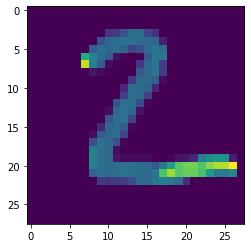

In [11]:
# Mengecek Prediksi Ternyata prediksi benar
plt.imshow(x_test[1])
plt.show()